In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/kaggle/input/distilbert-embeddings-llm-detect-dataset/dataset2_distilbert_with_embeddings.csv')

# Convert the string of embeddings into a list of floats by removing brackets and commas
df['distilbert2_embeddings'] = df['distilbert2_embeddings'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

# Display the first row to confirm the format
print(df[['cleaned_text', 'distilbert2_embeddings']].head())


                                        cleaned_text  \
0  carfree city become subject increasing interes...   
1  car free city carfree city concept gaining tra...   
2  sustainable urban future carfree city emerging...   
3  pioneering sustainable urban living era marked...   
4  path sustainable urban living age rapid urbani...   

                              distilbert2_embeddings  
0  [-0.0259938762, 0.244430274, 0.523206711, -0.0...  
1  [-0.106854953, 0.217540219, 0.483679354, -0.05...  
2  [-0.0993919671, 0.222865179, 0.505642235, -0.0...  
3  [-0.13743192, 0.211839497, 0.468977571, -0.065...  
4  [-0.133995503, 0.234965816, 0.487828583, -0.05...  


In [3]:
# Prepare the feature matrix (X) and labels (y)
X = np.vstack(df['distilbert2_embeddings'].values)  # Stack embeddings into a 2D array
y = df['label']  # Replace 'label' with the actual name of your label column if different

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier with optimized parameters
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

In [7]:
# Lists to store accuracy at each iteration
train_accuracies = []
test_accuracies = []

In [8]:
for i in range(1, xgb.n_estimators + 1):
    xgb.set_params(n_estimators=i)  # Incrementally increase the number of estimators
    xgb.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    train_pred = xgb.predict(X_train)
    test_pred = xgb.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [9]:
train_accuracies

[0.599116486532853,
 0.599116486532853,
 0.599116486532853,
 0.9144793275004289,
 0.9469891919711786,
 0.955609881626351,
 0.9609710070337966,
 0.9648739063304169,
 0.9668039114770973,
 0.9683908045977011,
 0.9695059186824498,
 0.9707925887802368,
 0.9721650368845428,
 0.973323039972551,
 0.9748241550866358,
 0.9758106021616058,
 0.9766683822267971,
 0.9774403842854692,
 0.9779121633213244,
 0.9791988334191113,
 0.979927946474524,
 0.9803568365071196,
 0.9809572825527535,
 0.981600617601647,
 0.9826299536798765,
 0.9828443986961743,
 0.9837879567678847,
 0.9838308457711443,
 0.9845599588265569,
 0.984945959855893,
 0.9853748498884886,
 0.986018184937382,
 0.9863612969634585,
 0.9866615199862755,
 0.9871761880253903,
 0.9870904100188712,
 0.9873906330416881,
 0.9878624120775433,
 0.9883341911133985,
 0.9885486361296963,
 0.988977526162292,
 0.9890204151655515,
 0.9892348601818494,
 0.9895350832046663,
 0.9897495282209642,
 0.9901355292503002,
 0.9903070852633384,
 0.9907359752959342,
 0

In [10]:
test_accuracies

[0.6071367301423914,
 0.6071367301423914,
 0.6071367301423914,
 0.9109624292331446,
 0.9349802710585006,
 0.9427002916452222,
 0.9478469720363699,
 0.9523074283753645,
 0.9552238805970149,
 0.9576256647795506,
 0.9584834448447418,
 0.9595127809229713,
 0.961228341053354,
 0.9622576771315835,
 0.963973237261966,
 0.963973237261966,
 0.9648310173271574,
 0.9655172413793104,
 0.9655172413793104,
 0.9665465774575399,
 0.9668896894836164,
 0.9667181334705781,
 0.9680905815748841,
 0.968605249613999,
 0.9689483616400755,
 0.9694630296791903,
 0.9698061417052668,
 0.9698061417052668,
 0.9704923657574198,
 0.970663921770458,
 0.9704923657574198,
 0.9722079258878024,
 0.9723794819008407,
 0.9727225939269172,
 0.9730657059529937,
 0.9735803739921084,
 0.9737519300051467,
 0.9744381540572997,
 0.9740950420312232,
 0.9746097100703379,
 0.9749528220964144,
 0.975295934122491,
 0.9758106021616058,
 0.9754674901355292,
 0.9759821581746441,
 0.9761537141876823,
 0.9764968262137588,
 0.9768399382398353

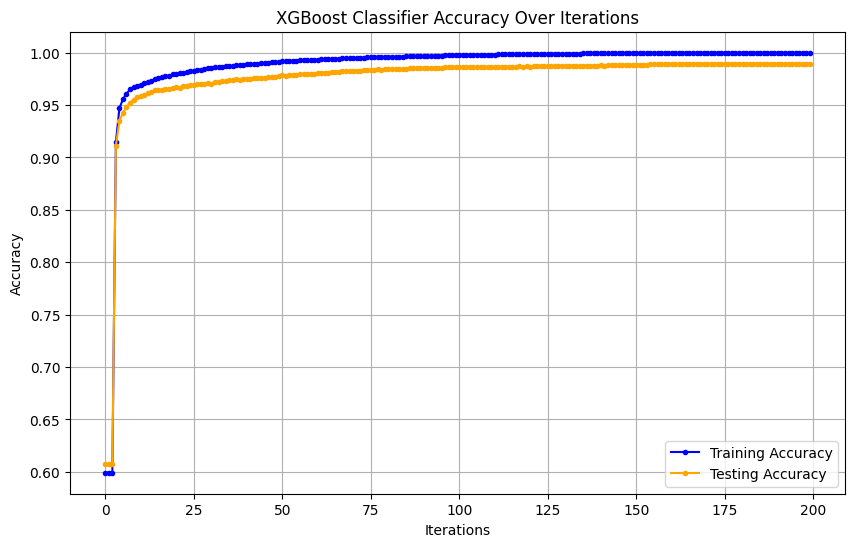

In [11]:
# Plot accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=3)
plt.plot(test_accuracies, label='Testing Accuracy', color='orange', marker='o', markersize=3)
plt.title('XGBoost Classifier Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Plot accuracy over iterations
plt.figure(figsize=(7, 4))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=3)
plt.title('XGBoost Classifier Training Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [15]:
# Plot accuracy over iterations
plt.figure(figsize=(7, 4))
plt.plot(test_accuracies, label='Testing Accuracy', color='orange', marker='o', markersize=3)
plt.title('XGBoost Classifier Testing Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Make predictions on the test set
y_pred = xgb.predict(X_test)

In [17]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [19]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3539
           1       0.99      0.98      0.99      2290

    accuracy                           0.99      5829
   macro avg       0.99      0.99      0.99      5829
weighted avg       0.99      0.99      0.99      5829



In [20]:
import matplotlib.pyplot as plt

# Initialize XGBClassifier with eval_metric in the constructor
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

# Initialize an empty dictionary to store evaluation results
evals_result = {}

# Fit the model with eval_set to track log loss over iterations
xgb.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=False)

# Extract log loss from the evaluation result
train_losses = xgb.evals_result()['validation_0']['logloss']
test_losses = xgb.evals_result()['validation_1']['logloss']


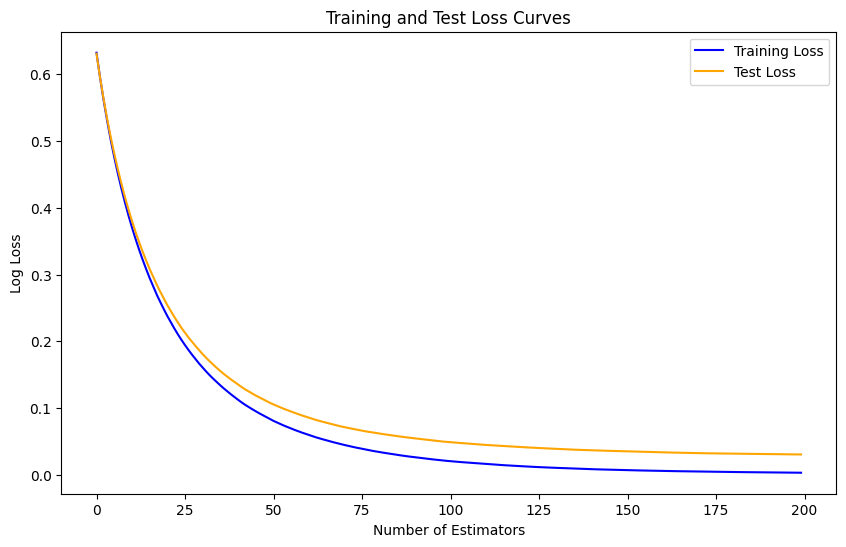

In [21]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss", color='blue')
plt.plot(test_losses, label="Test Loss", color='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Training and Test Loss Curves")
plt.legend()
plt.show()

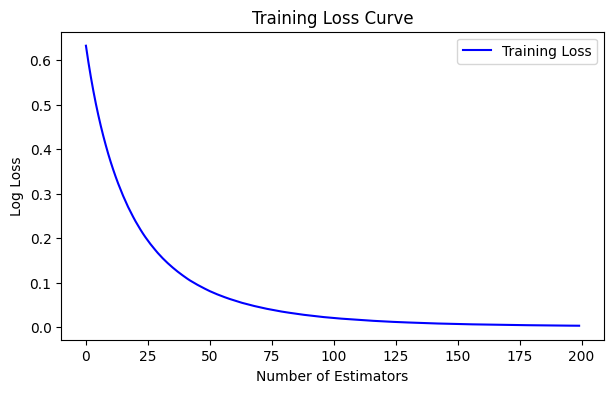

In [23]:
# Plot the loss curves
plt.figure(figsize=(7, 4))
plt.plot(train_losses, label="Training Loss", color='blue')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

In [25]:
# Plot the loss curves
plt.figure(figsize=(7, 4))
plt.plot(test_losses, label="Test Loss", color='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title(" Test Loss Curve")
plt.legend()
plt.show()

In [26]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Train Accuracy': train_accuracies,
    'Train Loss': train_losses,
    'Test Accuracy': test_accuracies,
    'Test Loss': test_losses
})


# Display the DataFrame as a table with borders
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+-----+------------------+--------------+-----------------+-------------+
|     |   Train Accuracy |   Train Loss |   Test Accuracy |   Test Loss |
+=====+==================+==============+=================+=============+
|   0 |         0.599116 |   0.632242   |        0.607137 |   0.630695  |
+-----+------------------+--------------+-----------------+-------------+
|   1 |         0.599116 |   0.59515    |        0.607137 |   0.595225  |
+-----+------------------+--------------+-----------------+-------------+
|   2 |         0.599116 |   0.561436   |        0.607137 |   0.562946  |
+-----+------------------+--------------+-----------------+-------------+
|   3 |         0.914479 |   0.530593   |        0.910962 |   0.533314  |
+-----+------------------+--------------+-----------------+-------------+
|   4 |         0.946989 |   0.502129   |        0.93498  |   0.506217  |
+-----+------------------+--------------+-----------------+-------------+
|   5 |         0.95561  |   0.476105 

In [27]:
# Sample classification report data
report = {
    'Human-Written': {'precision': 0.99, 'recall': 1.00, 'f1-score': 0.99, 'support': 3539},
    'Machine-Generated': {'precision': 0.99, 'recall': 0.98, 'f1-score': 0.99, 'support': 2290}
}

In [28]:
# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).T

In [29]:
# Plotting
labels = report_df.index
x = np.arange(len(labels))  # The label locations

In [30]:
# Set width of the bars
width = 0.10

fig, ax = plt.subplots(figsize=(7, 4))

# Create bars for precision, recall, and F1-score
bars1 = ax.bar(x - width, report_df['precision'], width, label='Precision', color='blue')
bars2 = ax.bar(x, report_df['recall'], width, label='Recall', color='orange')
bars3 = ax.bar(x + width, report_df['f1-score'], width, label='F1-score', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value annotations on top of the bars
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_annotations(bars1)
add_value_annotations(bars2)
add_value_annotations(bars3)

plt.ylim(0, 1.1)  # Set y-axis limit to give space for annotations
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()